# Practical 2: Recognising and plotting probability distributions

This week is focussed on using some common functions in Python to plot
data and distributions.

## Learning Outcomes

-   Familiarise yourself with opening data files in Python.
-   Familiarise yourself with plotting histograms of data in Python.

# Starting the Practical

As per last week, the process for every week will be the same: download
the notebook to your `QM` folder, switch over to `JupyterLab` (which
will be running in Podman/Docker) and get to work. If you want to save
the completed notebook to your Github repo, you can `add`, `commit`, and
`push` the notebook in Git after you download it. When you’re done for
the day, save your changes to the file (This is very important!), then
`add`, `commit`, and `push` your work to save the completed notebook.

## Loading the data

We are going to look at schools perfomance data in England.

The data is sourced from []() and is downloadable [here]().

We have saved a copy of this dataset to the Github repo, in case that
the dataset is removed from the website.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Read CSV file, handling common missing value entries
na_vals = ["", "NA", "SUPP", "NP", "NE", "SP", "SN", "SUPPMAT"]
df_ks4 = pd.read_csv(
    'L2_data/england_ks4final.csv',
    na_values = na_vals
)

info_cols = ['RECTYPE', 'LEA', 'SCHNAME', 'TOTPUPS']
ebaccs_cols = ['EBACCAPS', 'EBACCAPS_LO', 'EBACCAPS_MID', 'EBACCAPS_HI']

df_ks4 = df_ks4[info_cols + ebaccs_cols]

df_ks4[['TOTPUPS']+ebaccs_cols] = df_ks4[['TOTPUPS']+ebaccs_cols].apply(pd.to_numeric, errors='coerce')

df_ks4.head()

/tmp/ipykernel_12433/1207205982.py:7: DtypeWarning:

Columns (75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,144,145,146,147,148,149,150,151,152,177,178,179,180,181,182,183,186,187,188,189,190,191,192,194,195,196,198,199,200,202,203,204,206,207,208,210,211,212,214,215,216,218,219,220,222,223,224,230,233,234,235,236,237,238,239,242,243,244,245,246,247,248,251,252,253,254,255,256,257,266,267,268,269,270,271,272,281,282,283,284,285,286,287,296,297,298,299,300,301,302,311,312,313,314,315,316,317,335,336,337,340,341,342,345,346,347,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410) have mixed types. Specify dtype option on import or set low_memory=False.


You might be wondering why I’ve chosen the columns `info_cols` and
`ebaccs_cols`.

Looking at the metadata (which you can see in ‘L2_data/ks4_meta.xlsx’)
we can see the full meaning of each column header:

-   ‘RECTYPE’ = Record type (1=mainstream school; 2=special school;
    4=local authority; 5=National (all schools); 7=National (maintained
    schools))
-   ‘LEA’ = Local authority
-   ‘SCHNAME’ = School name
-   ‘TOTPUPS’ = Number of pupils on roll (all ages)
-   ‘EBACCAPS’ = Average EBacc APS score per pupil
-   ‘EBACCAPS_LO’ = Average EBacc APS score per pupil with low prior
    attainment
-   ‘EBACCAPS_MID’ = Average EBacc APS score per pupil with middle prior
    attainment
-   ‘EBACCAPS_HI’ = Average EBacc APS score per pupil with high prior
    attainment

The EBacc is a measure of students school grades calculated as an
avergae score across a set number of subjects. It is used as a
performance indicator of English schools. You can read more about it
[here](https://en.wikipedia.org/wiki/English_Baccalaureate#:~:text=Added%20together%2C%20this%20gives%20a,for%20girls%202018%20was%204.33.).

## Describing the dataframe

### Check how much data is missing

In [2]:
# print how much data is missing for each column
df_ks4.isna().mean() * 100 

RECTYPE          0.000000
LEA              0.034406
SCHNAME          2.683640
TOTPUPS          1.221400
EBACCAPS        17.684500
EBACCAPS_LO     38.775159
EBACCAPS_MID    41.149148
EBACCAPS_HI     42.490969
dtype: float64

It seems suspiscious that the school names are missing for some of the
entries - let’s check these.

In [3]:
# return rows where SCHNAME is missing
df_ks4[df_ks4['SCHNAME'].isna()]

156 rows × 8 columns

So, these are all record type 4, 5, or 7 - i.e. they’re not individual
schools! Let’s limit the selection to only mainstream and special
schools.

In [4]:
# only keep rows where RECTYPE is 1 or 2 
df_ks4 = df_ks4[df_ks4['RECTYPE'].isin([1, 2])].copy()

Now we can check the data dimensions.

In [5]:
rows, cols = df_ks4.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 5657, Columns: 8

### Summary statistics

We can use the `describe` function in pandas to easily get the summary
statistics for a dataframe.

In [6]:
numerical_cols = ['TOTPUPS', 'EBACCAPS', 'EBACCAPS_LO', 'EBACCAPS_MID', 'EBACCAPS_HI']

df_ks4[numerical_cols].describe()

## Histograms

Let’s try plotting the Average EBacc APS score per pupil.

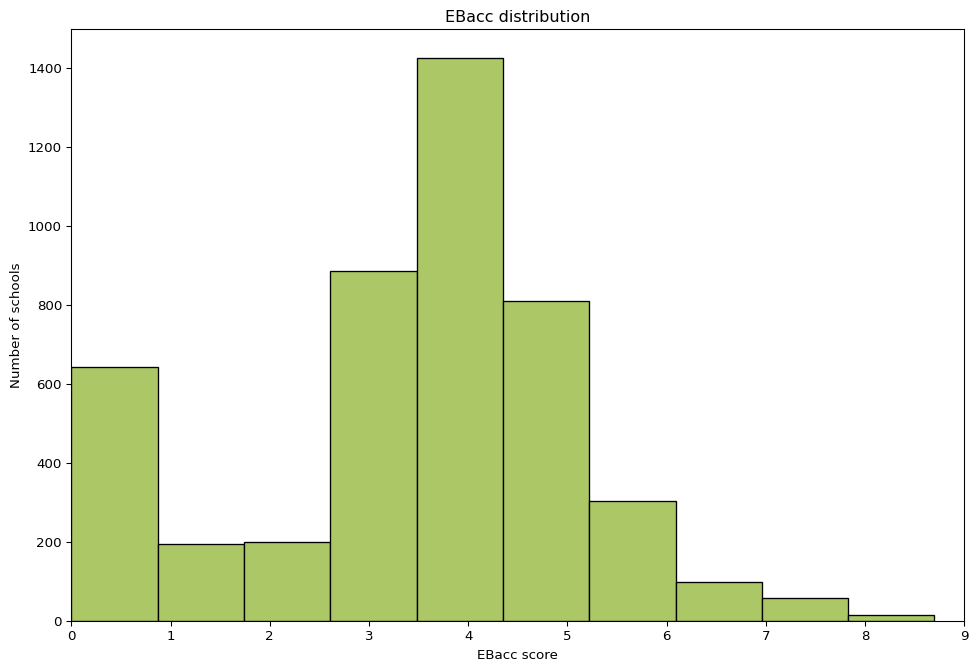

In [7]:
n_bins = 10
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(df_ks4['EBACCAPS'].dropna(), bins=n_bins, color='#abc766', edgecolor='black')
ax.set_title('EBacc distribution')
ax.set_xlabel('EBacc score')
ax.set_ylabel('Number of schools')  
ax.set_xlim(0,9) # the EBacc has a maximum score of 9

plt.show()

What do you observe from this boxplot? Because the bins are quite large
it’s difficult to get a sense of the distribution - try changing this to
get a better idea of the data spread.

#### Question

In [ ]:
n_bins = ??
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(df_ks4['EBACCAPS'].dropna(), bins=n_bins, color='#abc766', edgecolor='black')
ax.set_title('EBacc distribution')
ax.set_xlabel('EBacc score')
ax.set_ylabel('Number of schools')  
ax.set_xlim(0,9) # the EBacc has a maximum score of 9

plt.show()

### Is it normally distributed?

Looking at the histogram does the data look normally distributed?

Remember the key features of the normal distribution:

-   Data is continuous
    -   it is something you measure not something you count
-   Data is equally likely to be larger or smaller than average
    -   symmetric
-   Characteristic size, all data points are close to the mean
    -   single peak
-   There is less data further away from the mean
    -   smooth tails on both sides

One way to consider whether it is normally distributed is to overlay the
normal distribution on top.

We can use the package `scipy.stats` which has functions for generating
probability density functions for common distributions. You can see
which common distributions
[here](https://docs.scipy.org/doc/scipy/reference/stats.html).

/tmp/ipykernel_12433/2445938851.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.


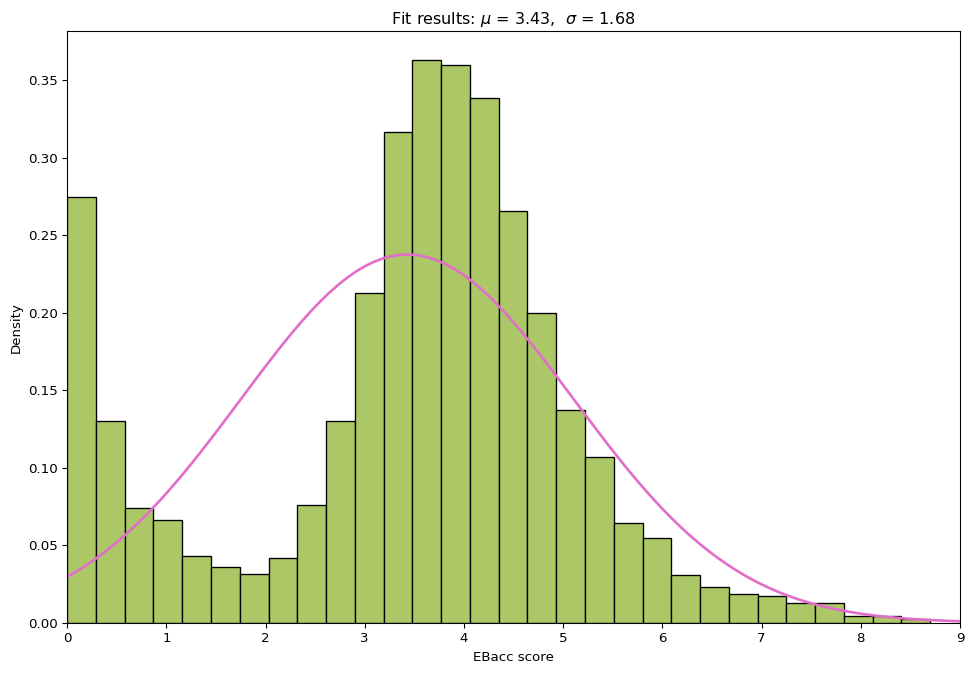

In [9]:
import scipy.stats as sps

# first let's get the mean and stand deviation 
mu = df_ks4['EBACCAPS'].dropna().mean()
std = df_ks4['EBACCAPS'].dropna().std()

## Create the plot 

# plot the histogram
plt.figure(figsize=(12, 8))
plt.hist(df_ks4['EBACCAPS'], bins=30, density=True, color='#abc766', edgecolor='black')

# plot the Probability Density Function (PDF)
xmin = 0 
xmax = 9
x = np.linspace(xmin, xmax, 100)
p = sps.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color="#e16fca")

plt.title(f"Fit results: $\mu$ = {mu:.2f},  $\sigma$ = {std:.2f}")
plt.xlim(0, 9)
plt.xlabel("EBacc score")
plt.ylabel("Density")

plt.show()

Note that this time we plot the histogram with `density=True` - this
scales the histogram data.

## You’re Done!

Congratulations on completing the second QM practical session! If you
are still working on it, take your time.

Don’t worry about understanding every detail of the Python code — what
matters most is knowing which functions to use for a specific task, like
checking minimum and maximum values or generating boxplots, and knowing
how to debug when it goes wrong. Remember, practice makes perfect.